<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/Tokenization_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization

In [ ]:
import nltk
from nltk.tokenize import(TreebankWordTokenizer,
                          TweetTokenizer,
                          MWETokenizer)

In [ ]:
#Create tokenizers:
tree = TreebankWordTokenizer()
tweet = TweetTokenizer()
mwe = MWETokenizer()

# Create a string input
sent1 = 'There are more things in heaven and earth, Horatio, than are dreamt of in your philosophy'
     
# Use tokenize method
print(f'Treebank -> {tree.tokenize(sent1)}')
print(f'Tweettokenizer -> {tweet.tokenize(sent1)}')
print(f'MWEtokenizer -> {mwe.tokenize(sent1)}')

Treebank -> ['There', 'are', 'more', 'things', 'in', 'heaven', 'and', 'earth', ',', 'Horatio', ',', 'than', 'are', 'dreamt', 'of', 'in', 'your', 'philosophy']
Tweettokenizer -> ['There', 'are', 'more', 'things', 'in', 'heaven', 'and', 'earth', ',', 'Horatio', ',', 'than', 'are', 'dreamt', 'of', 'in', 'your', 'philosophy']
MWEtokenizer -> ['T', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'm', 'o', 'r', 'e', ' ', 't', 'h', 'i', 'n', 'g', 's', ' ', 'i', 'n', ' ', 'h', 'e', 'a', 'v', 'e', 'n', ' ', 'a', 'n', 'd', ' ', 'e', 'a', 'r', 't', 'h', ',', ' ', 'H', 'o', 'r', 'a', 't', 'i', 'o', ',', ' ', 't', 'h', 'a', 'n', ' ', 'a', 'r', 'e', ' ', 'd', 'r', 'e', 'a', 'm', 't', ' ', 'o', 'f', ' ', 'i', 'n', ' ', 'y', 'o', 'u', 'r', ' ', 'p', 'h', 'i', 'l', 'o', 's', 'o', 'p', 'h', 'y']


**Neural Nets**

In [ ]:
#This is a tokenization example while working with neural nets.  Info only,  this is not directly applicable to the current use case:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
sent2 = "Mary had a little lumb and, according to GPT3, ate it with the mint jelly"
encoded_input = tokenizer(sent2)
print(encoded_input.input_ids)

[101, 2090, 1125, 170, 1376, 181, 1818, 1830, 1105, 117, 2452, 1106, 15175, 1942, 1495, 117, 8756, 1122, 1114, 1103, 22532, 179, 23083, 102]


In [ ]:
pip install spacy-transformers

In [ ]:
import spacy
from termcolor import colored

In [ ]:
import spacy.cli

In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
spacy.cli.download('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp_sm = spacy.load('en_core_web_sm')

In [ ]:
nlp_lg = spacy.load('en_core_web_lg')

In [ ]:
nlp_trf = spacy.load("en_core_web_trf")

In [ ]:
st = ['Make it so we can hide and unhide the carousel',
      'Mary had a little lamb and, according to GPT3, ate it with the mint jelly',
      '-The well-tested code',
      "I'M GONNA PUKE",
      'Much sleeker. Very attractive!..I would strongly recommend',
      'CoughROOTCough',
      "So...I'm very happy",
      'A starling among starlings',
      'It was a love-fest',
      "It's great!",
      'Kindle-Fire is on fire'
      ]

In [ ]:
doc_sm = []
for item in st:
  doc_sm.append(nlp_sm(item))

In [ ]:
doc_lg = []
for item in st:
  doc_lg.append(nlp_lg(item))

In [ ]:
doc_trf = []
for item in st:
  doc_trf.append(nlp_trf(item))

In [ ]:
doc = nlp('Make it so we can hide and unhide the carousel')

In [ ]:
def res_prt(doc,st):
  for item, text in zip(doc,st):
    print(colored(text,'red'))
    for token in item:
      print(token.text,token.pos_, token.tag_)
    print(' ')

In [ ]:
print(colored('EN_CORE_WEB_LG','blue'))
res_prt(doc_lg,st)
print(colored('EN_CORE_WEB_SM','blue'))
res_prt(doc_sm,st)

In [ ]:
res_prt(doc_trf,st)

In [ ]:
for token in doc:
    print(token.text,token.pos_, token.tag_)

In [ ]:
doc = nlp('I have limited bookshelf space.')

-The well-tested code<br> '\n-The well-tested code'<br>stopwords when spelled out: 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 15, 20, 40, 50, 60, 100<br>
not stopwords when spelled out: 7, 13, 14, 16, 17, 18, 19, 30, 70, 80, 90, 1000, 100000<br>Splits "3G", though not "401k"</br>Splits hyphenated words (including, e.g. "thirty-six", "x-ray", "wi-fi")<br>Doesn't catch multiword tokens like "in front of" or "according to"<br>I'M GONNA PUKE<br>Much sleeker. Very attractive!..I would strongly recommend<br>sturdy(something<br>Rosette calls "CoughROOTCough" a proper noun, which, sure.  Spacy calls it a number, which, what?<br>"So...I'm very happy."<br>"A starling among starlings."<br>"It was a love-fest"<br>'Its great!'


# Text Analysis

In [1]:
import json
import re
import numpy as np

In [27]:
from scipy.spatial import distance

In [3]:
# file upload while using Google Colab
from google.colab import files
uploaded = files.upload()

Saving vector.npz to vector.npz


In [4]:
data = []
with open('kindle.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In [ ]:
data[50]['text']

In [5]:
txts = [] 
for item in data:
  txts.append(re.sub('\n+', ' ', item['text']))

**Google Unviersal Encoder Model**

In [23]:
!pip install -q tensorflow-hub
import tensorflow_hub as hub

In [24]:
#using universal sentence encoder to get sentence encodings
#Load the Universal Sentence Encoder's TF Hub module
#param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
print ("module {} loaded".format(module_url))
model = hub.load(module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


**lumi embeddings**

In [ ]:
test_data = np.load('vector.npz')
#test_data['vect'][0]

In [5]:
test_data['vect'].shape

(6965, 300)

In [6]:
concept_data = np.load('concept_vector.npz')
concept_data['vect'].shape

(10, 300)

In [7]:
lumi = np.concatenate((test_data['vect'],concept_data['vect']), axis=0); lumi.shape

(6975, 300)

In [30]:
lumi = []
for row in test_data['vect']:
  lumi.append(row)

In [33]:
lumi[0][0]

0.9424514770507812

**embedding using universal encoder**

In [25]:
concepts = ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']
concept_vectors = np.array(model(concepts))

In [9]:
embedding_tuples = []
for item in txts:
  tmp = embed([item]).numpy(),item
  embedding_tuples.append(tmp)

In [ ]:
embedding_tuples[0]

In [10]:
test = []
for item in txts:
  test.append(embed([item]).numpy().flatten())

In [11]:
test = np.array(test); test.shape

(6965, 512)

In [12]:
test_test = np.concatenate((test,concept_vectors), axis=0); test_test.shape

(6975, 512)

In [9]:
# data visualization:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [34]:
# visualization code
def tsne_plot(emb):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for i in range(len(emb)):
        #tokens.append(emb[i][0])
        #labels.append(emb[i][1])
    tkns = np.array(emb)
    tkns = tkns.reshape(tkns.shape[0], -1)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tkns)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    #Outputting all the embeddings
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
    plt.show()

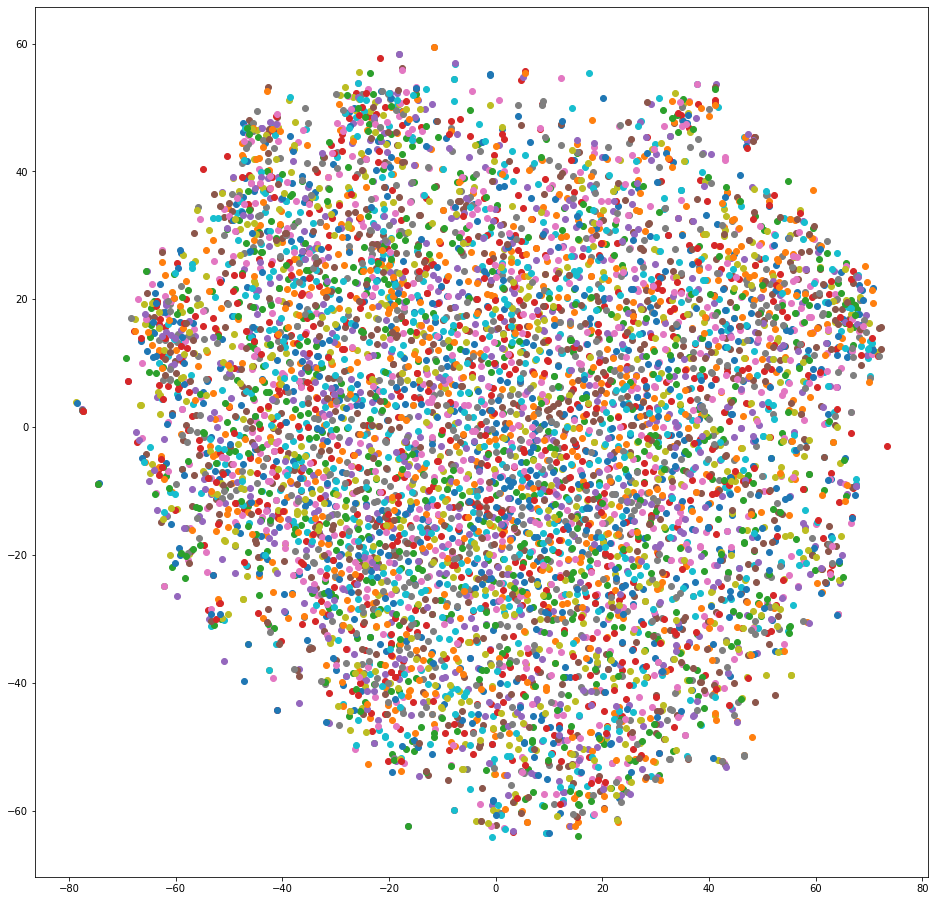

In [35]:
#tsne_plot(embedding_tuples)
tsne_plot(lumi)

In [21]:
# some funcier visualization code
def tsne_plot_fancy(emb):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for i in range(len(emb)):
        #tokens.append(emb[i][0])
        #labels.append(emb[i][1])
    #tokens = np.array(emb)
    #print(tokens[:1])
    #tokens = tokens.reshape(tokens.shape[0], -1)
    #points = points.reshape(tkns.shape[0], -1)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(emb)
    #concepts_values = tsne_model.fit_transform(points)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    print(new_values[-10:])
    x_p = []
    y_p = []
    for value in new_values[-10:]:
        x_p.append(value[0])
        y_p.append(value[1])    

        
    plt.figure(figsize=(16, 16)) 
    #Outputting all the embeddings and overlying concepts
    lb = ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
    for i in range(len(x_p)):
        plt.scatter(x_p[i],y_p[i],s=500,c='darkblue')
        '''plt.annotate(lb[i],
              xy=(x_p[i], y_p[i]),
              xytext=(15, 15),
              textcoords='offset points',
              fontsize = 12,
              ha='right',
              va='bottom')  '''
    plt.show()

[[ -4.180652  -59.0469   ]
 [ 40.489338  -18.087015 ]
 [ 45.76149    -6.4174824]
 [-28.779793  -39.422756 ]
 [ -4.189738  -59.018326 ]
 [ 53.536438  -26.654696 ]
 [ -4.195783  -58.99838  ]
 [ -8.17021   -43.90645  ]
 [-28.982622  -39.634308 ]
 [ 53.530563  -26.637133 ]]


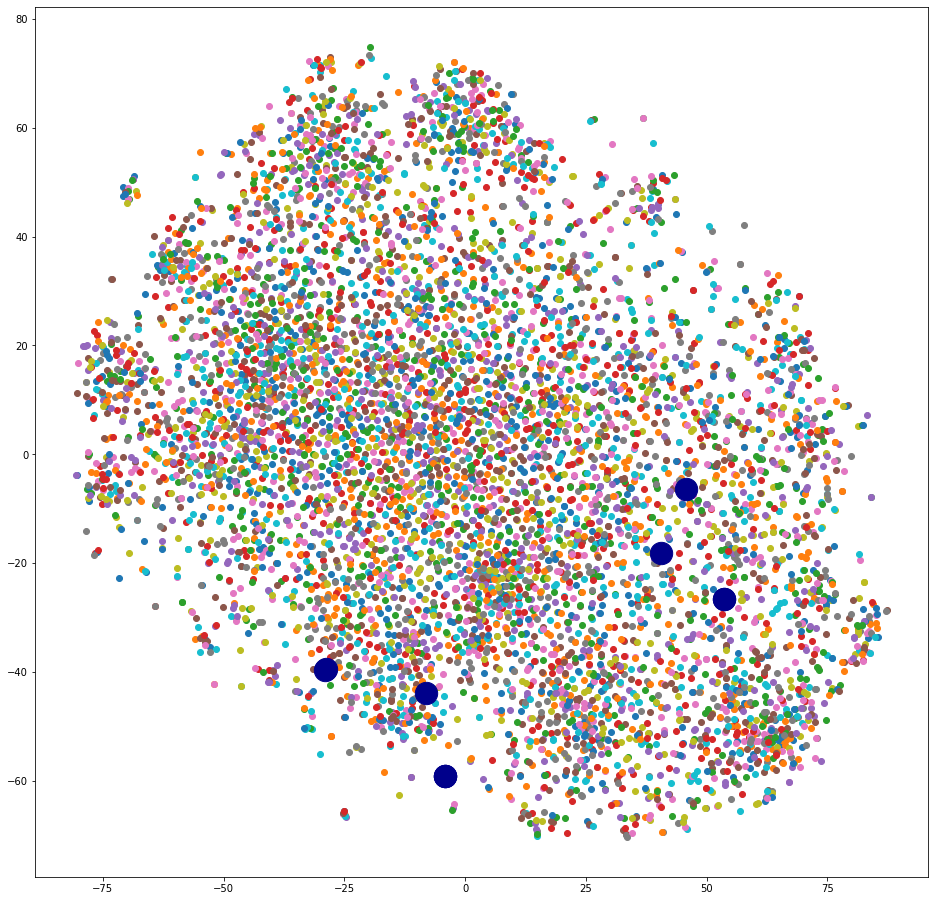

In [44]:
#tsne_plot with concepts overlay(embedding_tuples)
tsne_plot_fancy(test_test)

[[ 12.759916    38.13936   ]
 [-61.057735    34.782906  ]
 [-59.99293    -12.0244055 ]
 [ 28.140495    54.88073   ]
 [ 39.68962    -28.86386   ]
 [ 53.335556   -11.934025  ]
 [ 29.240726   -33.661976  ]
 [-10.577541    47.83827   ]
 [-49.259823   -27.52593   ]
 [-59.68513      0.14225568]]


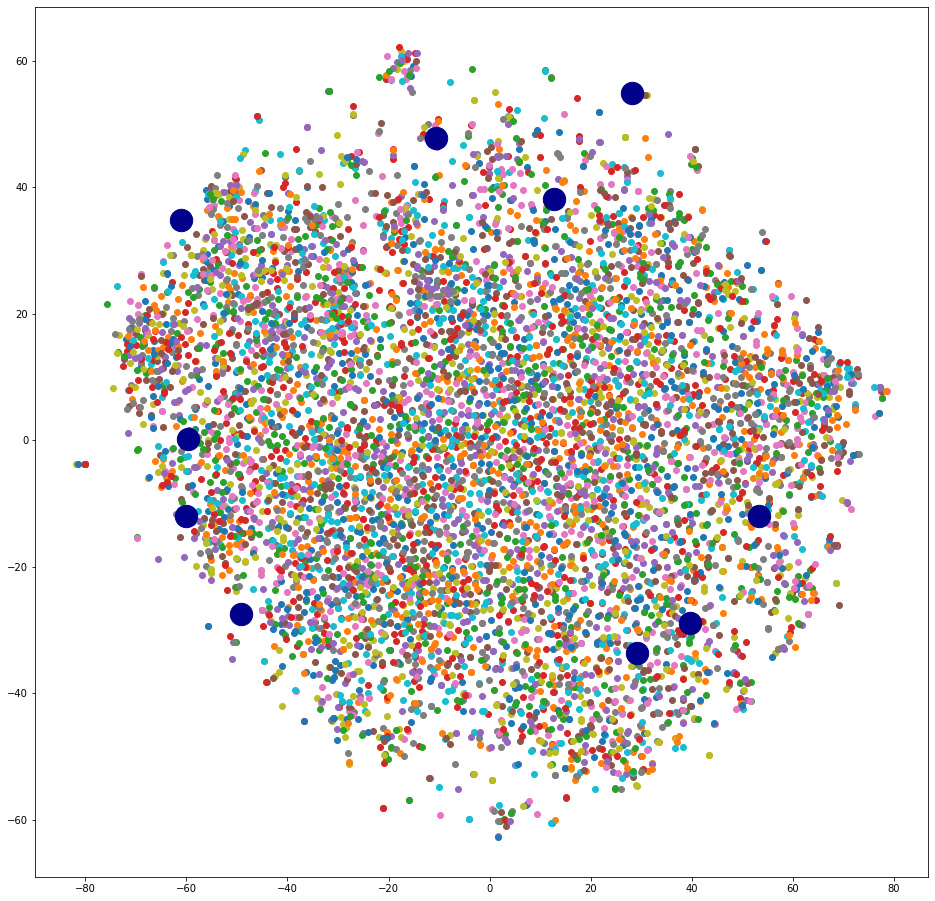

In [22]:
tsne_plot_fancy(lumi)

 [ -4.180652  -59.0469   ] -- 'Kindle' (1)<br>
 [ 40.489338  -18.087015 ] -- 'Amazon'(2)<br>
 [ 45.76149    -6.4174824] -- 'apps'(3)<br>
 [-28.779793  -39.422756 ] -- 'tablet' (4)<br>
 [ -4.189738  -59.018326 ] -- 'Kindle Fire (5)'<br>
 [ 53.536438  -26.654696 ] -- 'purchase'(6)<br>
 [ -4.195783  -58.99838  ] -- 'Kindle Fire HD' (7)<br>
 [ -8.17021   -43.90645  ] -- 'iPad' (8)<br>
 [-28.982622  -39.634308 ] -- 'device' (9)<br>
 [ 53.530563  -26.637133 ] -- 'download'(10)<br>
 ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']

**Documents to Concepts Measuring**

In [24]:
#512 - dimensional embeddings
top_20 = []
target = concept_vectors[4]
for ind, item in enumerate(embedding_tuples[:10]):
    tmp = distance.cosine(item[0],target),item[1],ind
    top_20.append(tmp)

top_20.sort()

for ind, item in enumerate(embedding_tuples[10:100]):
  tmp = distance.cosine(item[0],target),item[1],ind
  if tmp[0]<top_20[-1][0]:
    top_20.pop()
    top_20.append(tmp)
    top_20.sort

In [25]:
[item[2] for item in top_20]

[1, 2, 6, 8, 4, 7, 0, 5, 9, 51]

[2, 6, 1, 4, 8, 7, 0, 5, 9, 51]

In [18]:
import pprint
pp = pp = pprint.PrettyPrinter(indent=1, width=100)
for text in top_20:
  pp.pprint(text[1])
  print(' ')

('Background: My husband I have been iPhone users for awhile now. And I own a Nook ereader (just '
 "the black and white kind - so my kids wouldn't borrow it!) For Christmas, my oldest asked for a "
 'laptop. After doing some serious thinking and some serious research - I actually bought both of '
 'my children (5 and 10 years old) the Kindle Fire HDs. While they have not had the chance to play '
 'with them since they are for Christmas - I have played with them extensively (I had to get them '
 'all set up for Christmas!) However, I took my kids by a store and walked them by the Kindle Fire '
 'HD display. They both immediately went to it and had it figured out within minutes. I love that '
 'the learning curve is short and sweet on it! Here are some of my thoughts: The screen quality is '
 'amazing! Really, it\'s the best that I have seen out there. It\'s just "wow!" The sound is '
 'great. My first thought was that I wish it had a plug so my kids could plug in headphones. Then '
 "I

*USEFUL CODE SNIPPETS*

In [28]:
concepts = ['Kindle','Amazon','apps','tablet','Kindle Fire','purchase','Kindle Fire HD','iPad','device','download']
concept_vectors = np.array(model(concepts))

In [45]:
distance.cosine(concept_vectors[0],concept_vectors[4])

0.16349083185195923

In [ ]:
concept_data = np.load('concept_vector.npz')
concept_data['vect'].shape

In [59]:
distance.cosine(concept_data['vect'][4],concept_data['vect'][9])

0.7924505973265297

In [88]:
#concept_vectors.shape
a=np.zeros((90,512))
concept_vectors_padded = np.concatenate((concept_vectors,a), axis=0); concept_vectors_padded.shape

(100, 512)

In [28]:
str1 = 'I\'m good'
str2 =  "I'm good"
str3 = 'I am good' 
inp = [str1,str2,str3]

In [34]:
out = np.array(model(inp))

In [45]:
distance.cosine(out[0],out[1])

0.0

In [ ]:
!unzip file_location

In [ ]:
for item in data:
  re.sub('\n+', ' ' item['text'])